#Подготовительный этап

In [1]:
# устанавливаем библиотеки
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [2]:
!pip install shap -q

In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.1 MB/s eta 0:00:00


In [4]:
!pip install -q pyngrok

In [5]:
# подключаем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import graphviz
import lightgbm as lgb
import matplotlib as mpl
import scipy.stats as stats
import warnings
import tqdm
import urllib
import shap

from sklearn import datasets
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc, accuracy_score, f1_score, max_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.tree import export_text, export_graphviz
from sklearn.metrics import (accuracy_score, mean_squared_error, r2_score,classification_report)
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
from scipy import stats
from xgboost.sklearn import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

sns.set()

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [6]:
# подключаем библиотеки для
import pickle
import streamlit as st

from pathlib import Path
from PIL import Image

In [7]:
# подключаем библиотеку для туннеля
from pyngrok import ngrok

# Загрузка датасета

In [8]:
#загружаем датасет (ссылка ниже)
df = pd.read_csv('train_камни_в_почках.csv')
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


Этот набор данных можно использовать для прогнозирования наличия камней в почках на основе анализа мочи.

79 образцов мочи были проанализированы с целью
определить, могут ли определенные физические характеристики мочи быть связаны с
образованием кристаллов оксалата кальция.
Шестью физическими характеристиками мочи являются:

gravity	- удельный вес, плотность мочи по отношению к воде;

ph - pH, отрицательный логарифм иона водорода;

osmo - осмолярность (мосм), единица измерения, используемая в биологии и медицине, но не в физической химии. Осмолярность пропорциональна концентрации
молекул в растворе;

cond - проводимость (мМхо, миллиМхо). Один Мхо равен одному обратному Ому. Проводимость пропорциональна концентрации заряженных
ионов в растворе;

urea - концентрация мочевины в миллимоль на литр;

calc- концентрация кальция (CALC) в миллимоль/литр.

target - целевая переменная

# Первый этап - EDA (Исследовательский анализ данных)

In [ ]:
# просмотрим информацию по датасету, определяем кол-во строк, столбцов и размер
df.info(memory_usage='deep')

In [10]:
# Размер датасета
print(f"В датасете {df.shape[0]} строк")

# Information about columns and data types
print(f"\n В датасете {df.shape[1]} столбцов, из них :")
print(df.dtypes.value_counts())

В датасете 414 строк

 В датасете 8 столбцов, из них :
int64      4
float64    4
Name: count, dtype: int64


In [11]:
# статистика по столбцам, включая пропущенные значения
df.describe (include='all').T

,count,mean,std,min,25%,50%,75%,max
id,414.0,206.500000,119.655756,0.000,103.250,206.500,309.750,413.00
gravity,414.0,1.017894,0.006675,1.005,1.012,1.018,1.022,1.04
ph,414.0,5.955459,0.642260,4.760,5.530,5.740,6.280,7.94
osmo,414.0,651.545894,234.676567,187.000,455.250,679.500,840.000,1236.00
cond,414.0,21.437923,7.514750,5.100,15.500,22.200,27.600,38.00
urea,414.0,278.657005,136.442249,10.000,170.000,277.000,385.000,620.00
calc,414.0,4.114638,3.217641,0.170,1.450,3.130,6.630,14.34
target,414.0,0.444444,0.497505,0.000,0.000,0.000,1.000,1.00


In [12]:
# смотрим долю пропусков
df.isnull().sum().sum ()

0

In [13]:
# смотрим кол-во пропусков
df.isna().sum()

,0
id,0
gravity,0
ph,0
osmo,0
cond,0
urea,0
calc,0
target,0


In [14]:
# смотрим дубликаты
df.duplicated().sum()

0

In [15]:
px.box(df)

In [16]:
px.box(df['gravity'])

In [17]:
px.box(df['ph'])

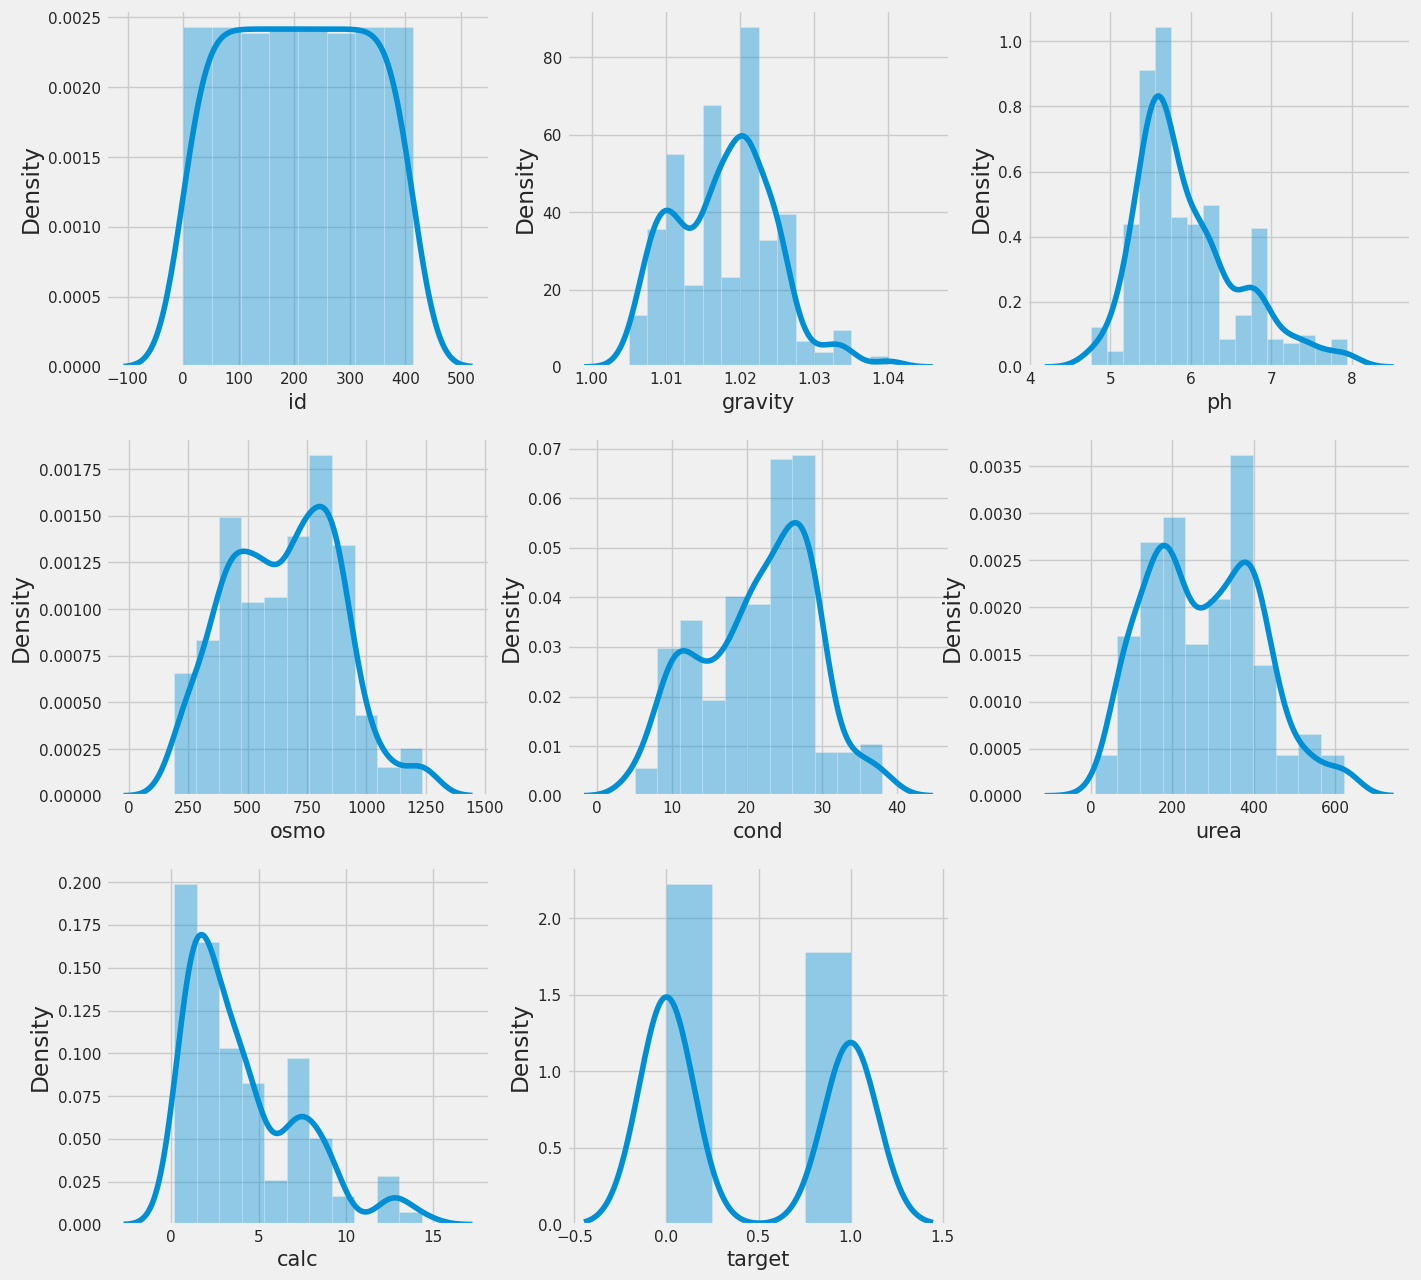

In [18]:
# смотрим распределение
plt.figure(figsize = (15, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1
plt.show()

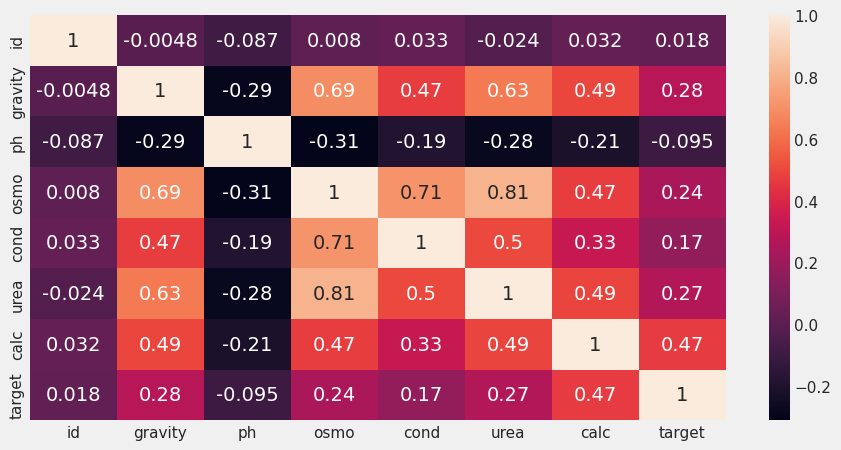

In [19]:
# создадим и нарисуем матрицу корреляций признаков
corr_matrix = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

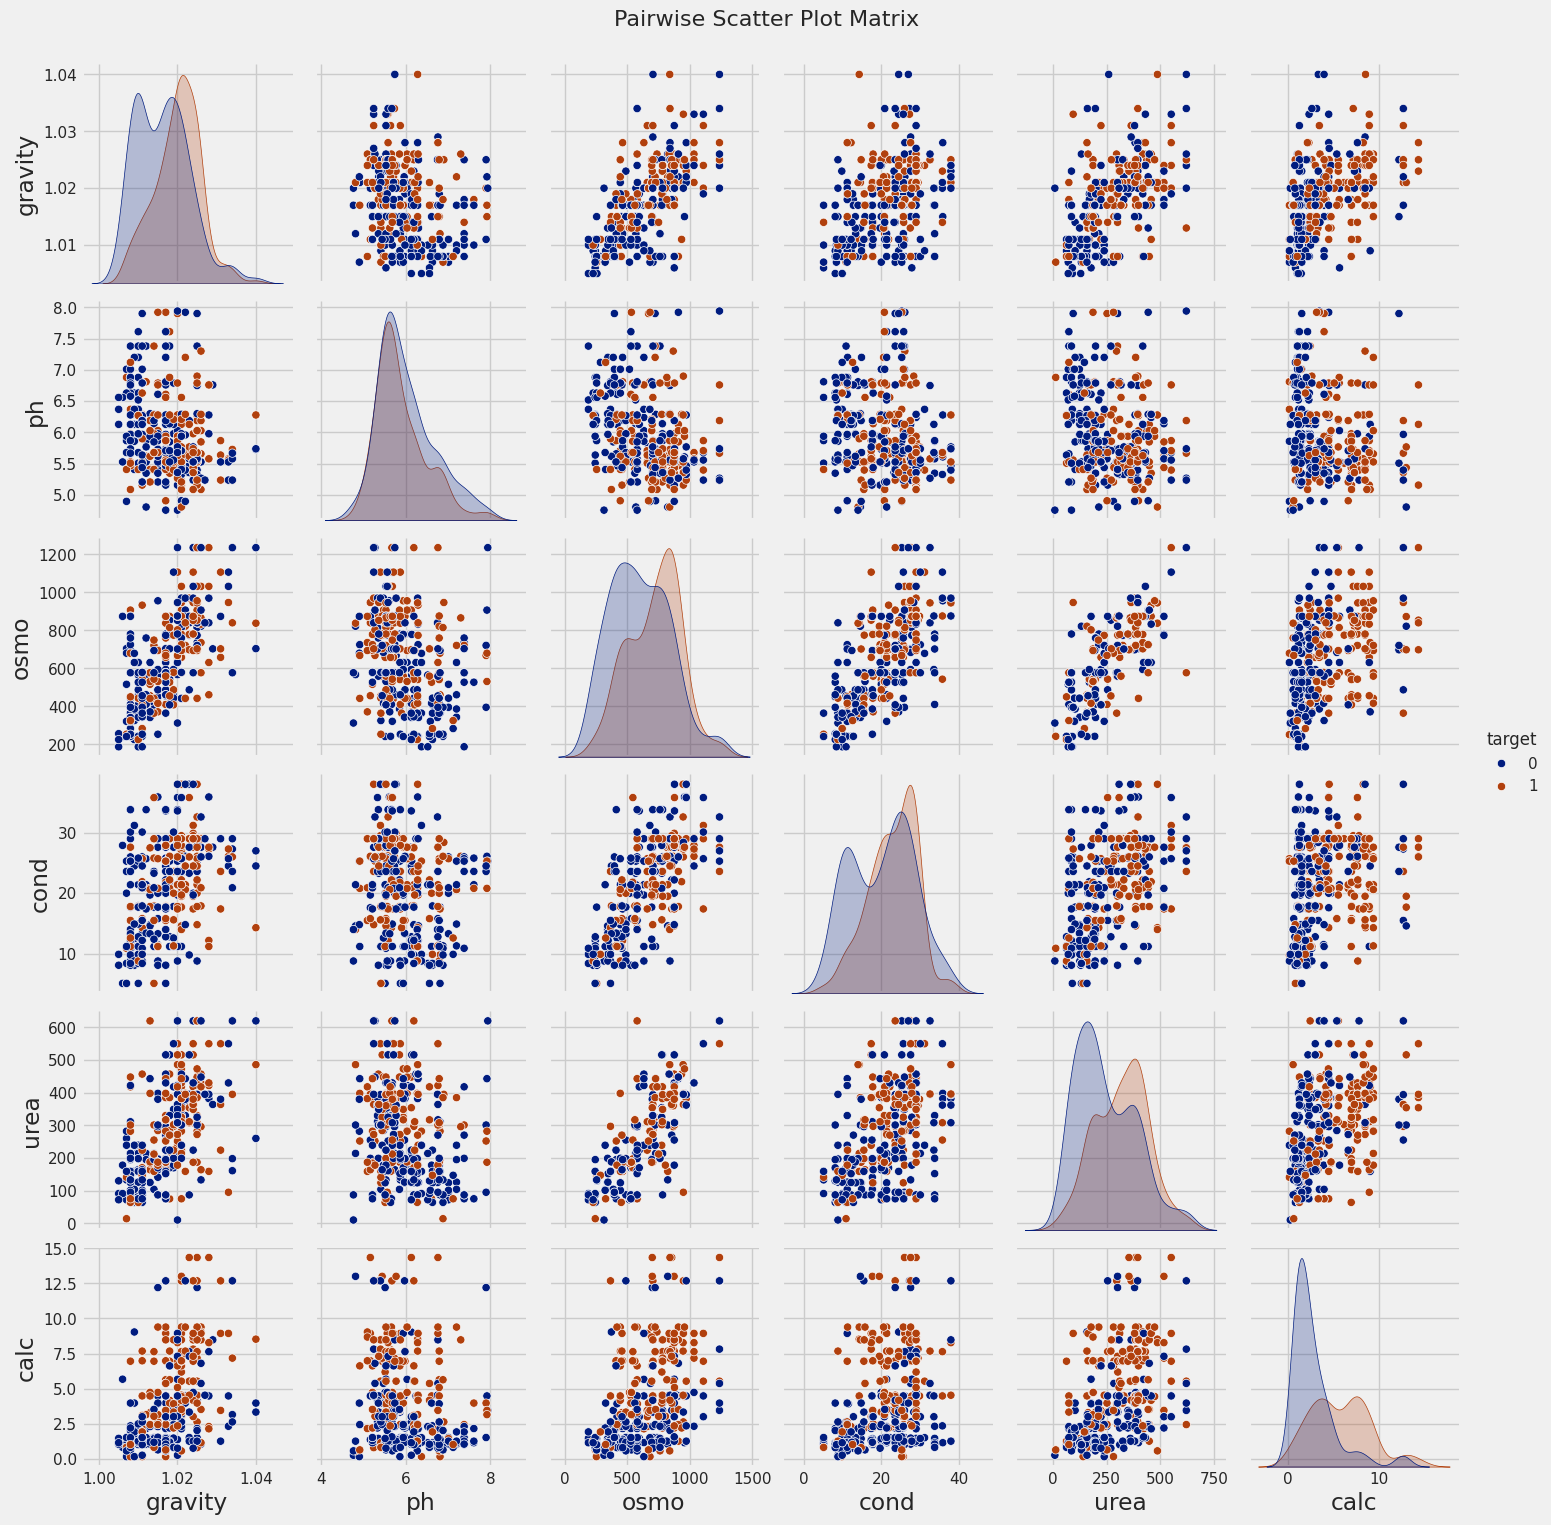

In [20]:
# смотрим парные графики
sns.pairplot(df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']], hue='target', palette='dark')
plt.suptitle('Pairwise Scatter Plot Matrix', fontsize=16, y=1.02)
plt.show()

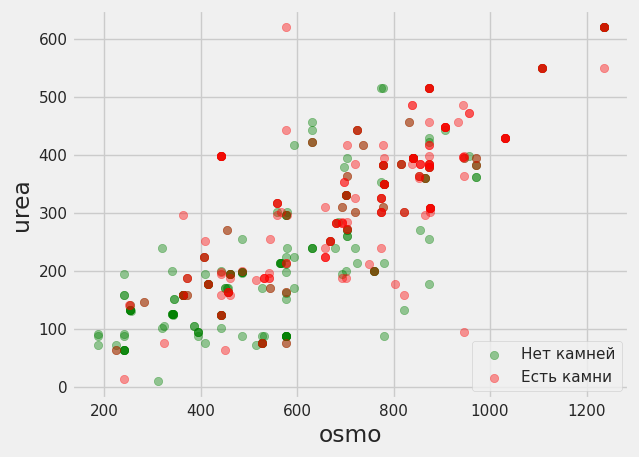

In [21]:
# разделение датасета на 2 части люди у которых есть камни в почках и у которых нет
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]

# визуализация зависимости осмолярности от уровня уровня концентрации мочевины с указанием есть камни или нет
plt.scatter(df_0.osmo, df_0.urea, color="green", label="Нет камней", alpha=0.4)
plt.scatter(df_1.osmo, df_1.urea, color="red", label="Есть камни", alpha=0.4)
plt.xlabel("osmo")
plt.ylabel("urea")
plt.legend(loc='lower right')
plt.show()

Вывод:


- между осмолярностью (osmo) и концентрацией мочевины (urea) +0,81. по графикам парных корреляций зависимость линейная
- между осмолярностью (osmo) и проводимостью (cond) +0,71, зависимость линейная
- между плотностью мочи (gravity) и осмолярностью (osmo) +0,69, зависимость линейная.

# Второй этап - Предварительная обработка данных

In [22]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [23]:
df.drop(columns=['id'], inplace=True)

In [24]:
px.box(df)

In [25]:
#cколько пропущенных значений отсутствует в каждом элементе
feature_columns = [
    'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'
]

print(f"{column} ==> Пропущенные значения: {df.isnull().mean()}")
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Значения  равные 0: {len(df.loc[df[column] == 0])}")

target ==> Пропущенные значения: gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64
gravity ==> Значения  равные 0: 0
ph ==> Значения  равные 0: 0
osmo ==> Значения  равные 0: 0
cond ==> Значения  равные 0: 0
urea ==> Значения  равные 0: 0
calc ==> Значения  равные 0: 0


In [26]:
#cколько пропущенных значений отсутствует в каждом элементе
feature_columns = [
    'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'
]

print(f"{column} ==> Пропущенные значения: {df.isna().mean()}")
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Значения  равные 0: {len(df.loc[df[column] == 0])}")

calc ==> Пропущенные значения: gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64
gravity ==> Значения  равные 0: 0
ph ==> Значения  равные 0: 0
osmo ==> Значения  равные 0: 0
cond ==> Значения  равные 0: 0
urea ==> Значения  равные 0: 0
calc ==> Значения  равные 0: 0


In [27]:
# предсказываем 0 или 1 - нет камней иили есть, X - все остальные признаки (задача классификации)
X = df.drop(columns='target').values
y = df[['target']].values

features = df.drop(columns='target').columns

X.shape, y.shape

((414, 6), (414, 1))

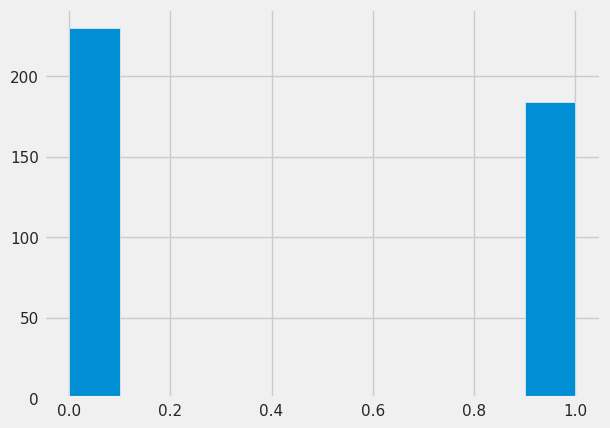

In [28]:
# распределение целевой переменной
plt.hist(y);

In [29]:
# разбиение на  тренировочную  (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 6), (83, 6), (331, 1), (83, 1))

In [30]:
# функция для настройки метрик качества
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"МАТРИЦА ОШИБОК (CONFUSION MATRIX):\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY ПАРАМЕТР:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"PRECISION ПАРАМЕТР:\n{precision_score(y_train, y_train_pred):.4f}")
    print(f"RECALL ПАРАМЕТР:\n{recall_score(y_train, y_train_pred):.4f}")
    print(f"F1 МЕРА:\n{f1_score(y_train, y_train_pred):.4f}")
    print(f"ОТЧЕТ О КЛАССИФИКАЦИИ:\n{clf_report}")

    print("РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"МАТРИЦА ОШИБОК (CONFUSION MATRIX):\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY ПАРАМЕТР:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"PRECISION ПАРАМЕТР:\n{precision_score(y_test, y_test_pred):.4f}")
    print(f"RECALL ПАРАМЕТР:\n{recall_score(y_test, y_test_pred):.4f}")
    print(f"F1 МЕРА:\n{f1_score(y_test, y_test_pred):.4f}")
    print(f"ОТЧЕТ О КЛАССИФИКАЦИИ:\n{clf_report}")

# Обучение модели

###Random Forest

Устойчива к выбросам, может плохо работать с сильно коррелированными данными

In [31]:
model_rf_clf = RandomForestClassifier(random_state=123, n_estimators=1000)
model_rf_clf.fit(X_train, y_train)
evaluate(model_rf_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[186   0]
 [  0 145]]
ACCURACY ПАРАМЕТР:
1.0000
PRECISION ПАРАМЕТР:
1.0000
RECALL ПАРАМЕТР:
1.0000
F1 МЕРА:
1.0000
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    186.0  145.0       1.0      331.0         331.0
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[34 10]
 [13 26]]
ACCURACY ПАРАМЕТР:
0.7229
PRECISION ПАРАМЕТР:
0.7222
RECALL ПАРАМЕТР:
0.6667
F1 МЕРА:
0.6933
ОТЧЕТ О КЛАССИФИКАЦИИ:
                   0          1  accuracy  macro avg  weighted avg
precision   0.723404   0.722222  0.722892   0.722813      0.722849
recall      0.772727   0.666667  0.722892   0.719697      0.722892
f1-score    0.747253   0.693333  0.722892   0.720293      0.721917
support    44.000000 

In [32]:
scores = {}
scores_f1 = {}

In [33]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, model_rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, model_rf_clf.predict(X_test)),
    }

In [34]:
scores_f1['Random Forest'] = {
        'Train': f1_score(y_train, model_rf_clf.predict(X_train)),
        'Test': f1_score(y_test, model_rf_clf.predict(X_test)),
}

In [35]:
scores_f1

{'Random Forest': {'Train': 1.0, 'Test': 0.6933333333333334}}

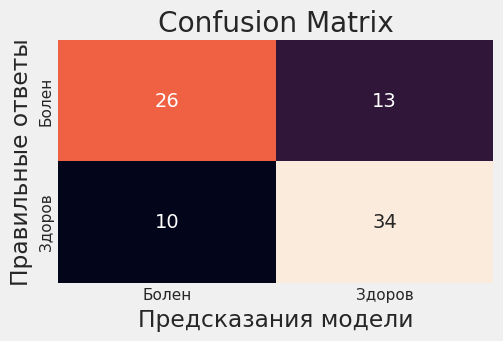

In [36]:
# предсказания модели на тестовых данных
y_pred = model_rf_clf.predict(X_test)

# создание confusion_matrix (в формате слева направо сверху вниз [TP, FN / FP, TN])
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# отрисовка confusion_matrix
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Предсказания модели')
ax.set_ylabel('Правильные ответы')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Болен', 'Здоров'])
ax.yaxis.set_ticklabels(['Болен', 'Здоров'])
plt.show()

In [37]:
# вероятности что есть камни в почках
y_probs = model_rf_clf.predict_proba(X_test)[:, -1]

# массивы TPR, FPR для каждого порога вероятностей
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)

# площадь под кривой
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7867132867132868

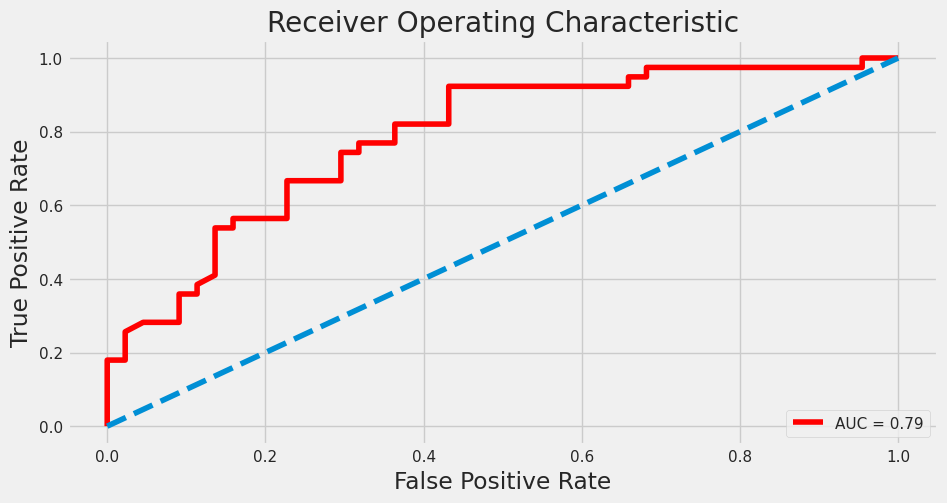

In [38]:
# отрисовка roc curve
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Catboost

In [39]:
model_cat_clf = CatBoostClassifier(n_estimators=100)
model_cat_clf.fit(X_train, y_train) #тренировка на данных
evaluate(model_cat_clf, X_train, X_test, y_train, y_test)

Learning rate set to 0.053076
0:	learn: 0.6824786	total: 47.4ms	remaining: 4.69s
1:	learn: 0.6709341	total: 48.4ms	remaining: 2.37s
2:	learn: 0.6634202	total: 53.8ms	remaining: 1.74s
3:	learn: 0.6549642	total: 55ms	remaining: 1.32s
4:	learn: 0.6465268	total: 57.1ms	remaining: 1.08s
5:	learn: 0.6381731	total: 62.2ms	remaining: 974ms
6:	learn: 0.6297132	total: 63.2ms	remaining: 839ms
7:	learn: 0.6229334	total: 64.1ms	remaining: 737ms
8:	learn: 0.6161251	total: 72.5ms	remaining: 733ms
9:	learn: 0.6102115	total: 74.6ms	remaining: 672ms
10:	learn: 0.6030087	total: 75.6ms	remaining: 611ms
11:	learn: 0.5967642	total: 84.6ms	remaining: 620ms
12:	learn: 0.5901734	total: 89ms	remaining: 595ms
13:	learn: 0.5839682	total: 91ms	remaining: 559ms
14:	learn: 0.5800858	total: 92.9ms	remaining: 527ms
15:	learn: 0.5758874	total: 94.9ms	remaining: 498ms
16:	learn: 0.5708885	total: 96.6ms	remaining: 472ms
17:	learn: 0.5665127	total: 98.5ms	remaining: 449ms
18:	learn: 0.5623614	total: 101ms	remaining: 429ms

In [40]:
scores['CatBoostClassifier Boosting'] = {
        'Train': accuracy_score(y_train, model_cat_clf.predict(X_train)),
        'Test': accuracy_score(y_test, model_cat_clf.predict(X_test)),
    }

In [41]:
scores_f1['CatBoostClassifier Boosting'] = {
        'Train': f1_score(y_train, model_cat_clf.predict(X_train)),
        'Test': f1_score(y_test, model_cat_clf.predict(X_test)),
}

In [42]:
scores_f1

{'Random Forest': {'Train': 1.0, 'Test': 0.6933333333333334},
 'CatBoostClassifier Boosting': {'Train': 0.7769784172661871,
  'Test': 0.7027027027027027}}

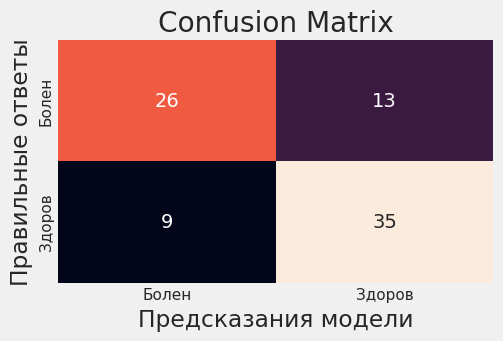

In [43]:
# предсказания модели на тестовых данных
y_pred = model_cat_clf.predict(X_test)

# создание confusion_matrix (в формате слева направо сверху вниз [TP, FN / FP, TN])
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# отрисовка confusion_matrix
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Предсказания модели')
ax.set_ylabel('Правильные ответы')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Болен', 'Здоров'])
ax.yaxis.set_ticklabels(['Болен', 'Здоров'])
plt.show()

In [44]:
# вероятности что есть камни в почках
y_probs = model_cat_clf.predict_proba(X_test)[:, -1]

# массивы TPR, FPR для каждого порога вероятностей
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)

# площадь под кривой
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7803030303030303

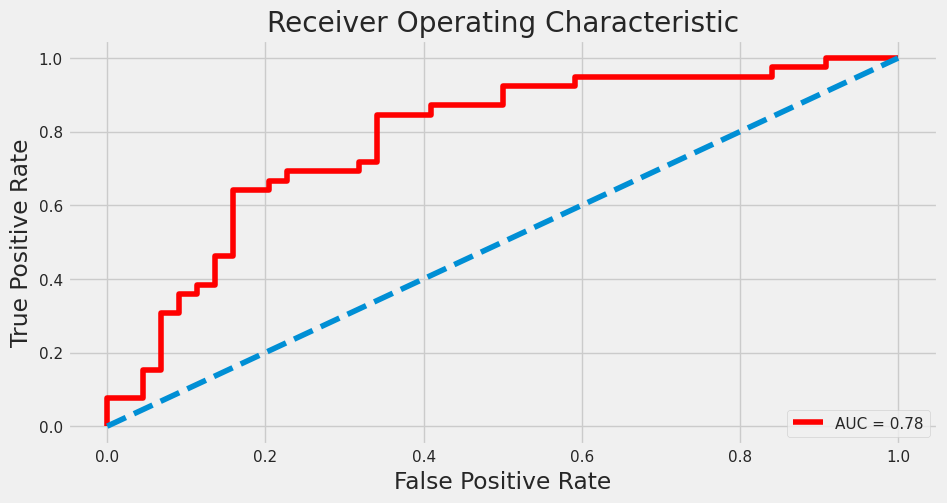

In [45]:
# отрисовка roc curve
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Сравнение моделей

<Axes: >

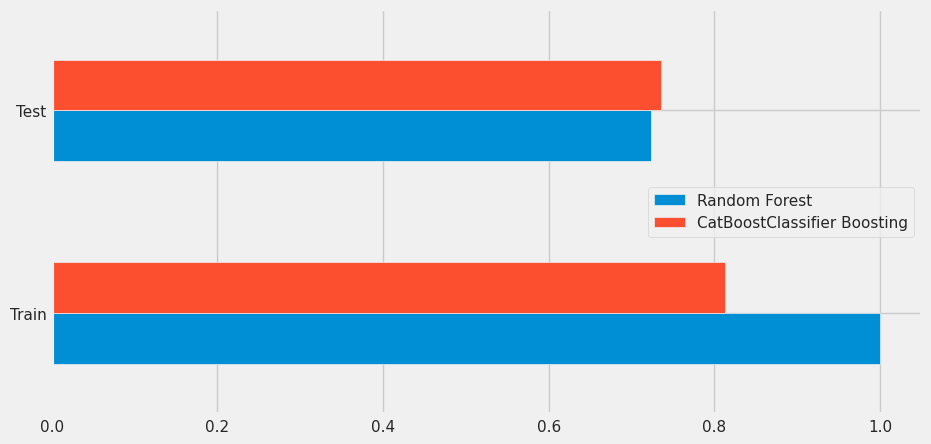

In [46]:
# Сравнение моделей по Accuracy

scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(10, 5))

<Axes: >

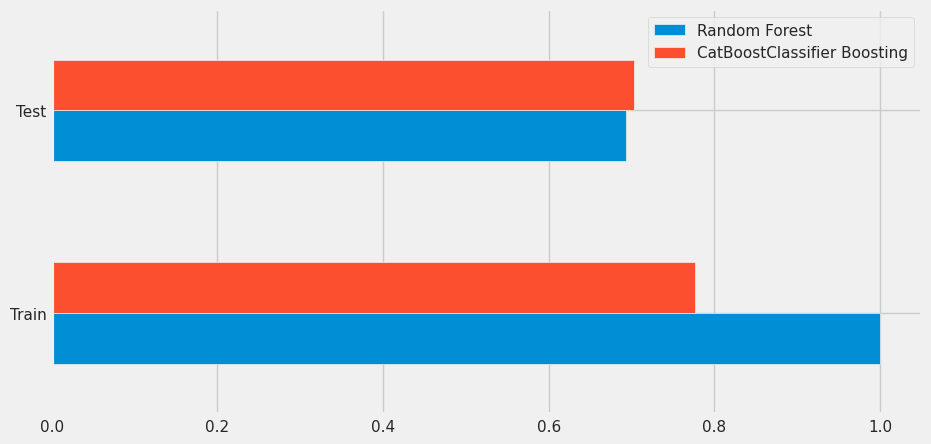

In [47]:
# Сравнение моделей по F1 мере

scores_f1_df = pd.DataFrame(scores_f1)

scores_f1_df.plot(kind='barh', figsize=(10, 5))

In [48]:
scores_df

,Random Forest,CatBoostClassifier Boosting
Train,1.000000,0.812689
Test,0.722892,0.734940


In [49]:
scores_f1_df

,Random Forest,CatBoostClassifier Boosting
Train,1.000000,0.776978
Test,0.693333,0.702703


Вывод:

По результатам анализа результат на обучаемой выборке лучше, чем на тестовой у обоих моделей.

На тестовой выборке лучший результат показал CatBoostClassifier Boosting по accuracy и f1 мере.

Вывод:

В целом показатели качества не плохие.

# Расшифровка

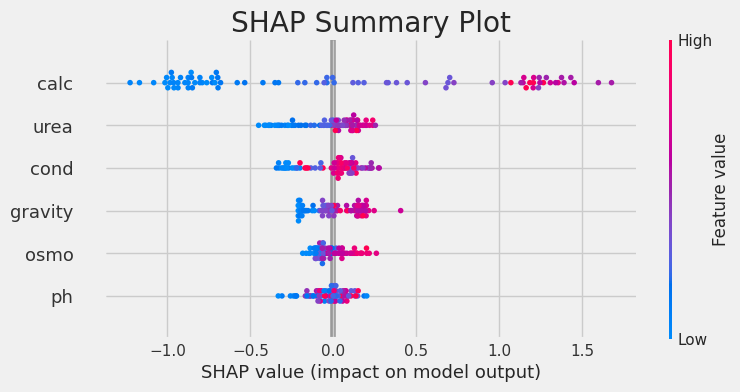

In [50]:
# посмотрим какие факторы оказывают большее влияние
explainer = shap.TreeExplainer(model_cat_clf)
shap_values = explainer.shap_values(X_test)

# График SHAP summary_plot
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)
plt.title("SHAP Summary Plot")
plt.show()

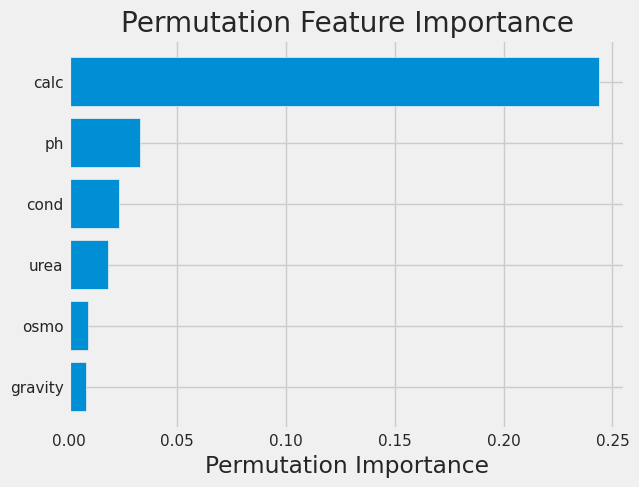

In [51]:
# посмотрим важность признаков с использованием Permutation Importance
X_p = df.drop(columns='target')
y_p = df['target']

result = permutation_importance(model_cat_clf, X_p, y_p, n_repeats=30, random_state=42, n_jobs=-1)

# График Permutation Feature Importance
sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_p.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_p.shape[1]), X_p.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

Вывод:
Наиболее важным фактором является концентрация кальция (calc)

# Сохранение модели

In [52]:
# сохранить на диск в формате pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model_cat_clf, f)

In [53]:
# загрузка сохраненной модели
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Инференс модели

In [54]:
features_dict = {
    'gravity': 'Удельный вес (плотность) мочи',
    'ph': 'Уровень PH',
    'osmo': 'Осмолярность (мосм)',
    'cond': 'Проводимость (мМхо)',
    'urea': 'Коцентрация мочевины (ммоль/л)',
    'calc': 'Концентрация кальция (ммоль/л)',
     }

features_dict

{'gravity': 'Удельный вес (плотность) мочи',
 'ph': 'Уровень PH',
 'osmo': 'Осмолярность (мосм)',
 'cond': 'Проводимость (мМхо)',
 'urea': 'Коцентрация мочевины (ммоль/л)',
 'calc': 'Концентрация кальция (ммоль/л)'}

In [55]:
features_dict.keys()

dict_keys(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'])

In [56]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [57]:
gravity = 1.01
ph = 5.8
osmo = 301
cond = 25.4
urea = 170
calc = 6

# входной массив для модели с добавлением размерности
data = np.array([gravity, ph, osmo, cond, urea, calc])[None]
print(data)
# предикт и получение вероятности первого класса (что есть камни в почках)
predict_proba = model.predict_proba(data)[0, 1]
predict_proba

[[  1.01   5.8  301.    25.4  170.     6.  ]]


0.5889056940206672

In [58]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)
shap_values

array([[-0.21953326, -0.07168588, -0.18220078,  0.02645637, -0.18118844,
         1.28667691]])

In [59]:
shap_values.sum()+explainer.expected_value

0.3594434157000215

In [60]:
# загрузим код визуализации JS в блокнот
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, features=data, feature_names=features)

In [61]:
explainer.expected_value

-0.2990814875131522